# High-precision numerical integration with Taylor methods

## Francesco Biscani (MPIA), Dario Izzo (ESA)

# Outline

1. Quick primer on Taylor methods
2. Comparison with other integrators
3. Examples

# Taylor methods

* Piecewise approximation of the solution via its Taylor series
* Mathematically elegant, conceptually simple
* Straightforward interpretation of the integration error as the series' **remainder**
* Excellent **performance** and **accuracy**

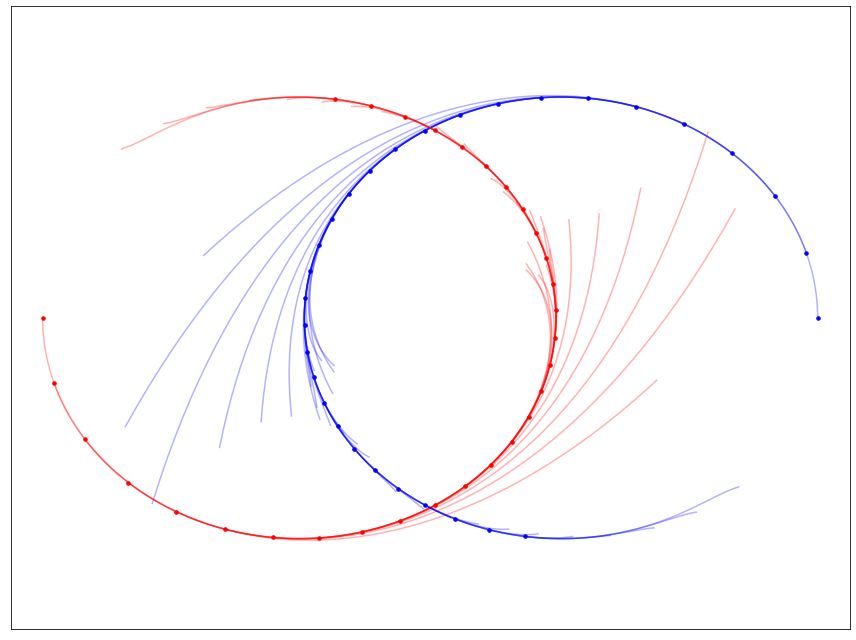

In [7]:
import heyoka as hy
import numpy as np
from copy import copy
from matplotlib.pylab import plt
plt.rcParams["figure.figsize"] = (12,9)

sys = hy.make_nbody_sys(2)

ax = plt.subplot(1,1,1)
plt.axis('equal')
ta = hy.taylor_adaptive(sys, state = [1, 0, 0, 0, .35, 0, -1, 0, 0, 0, -.35, 0], tol = 1e-6)

for _ in range(30):
    plt.plot(ta.state[0], ta.state[1], 'bo', markersize = 3.5)
    plt.plot(ta.state[6], ta.state[7], 'ro', markersize = 3.5)

    oc, h = ta.step(write_tc = True)

    dense_data = np.array([copy(ta.update_d_output(t)) for t in np.linspace(ta.time - h, ta.time + 6*h, 100)])

    plt.plot(dense_data[:, 0], dense_data[:, 1], 'b-', alpha=.3)
    plt.plot(dense_data[:, 6], dense_data[:, 7], 'r-', alpha=.3)

plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()

# However...
* Taylor methods are **not** widely used

# Implementation difficulties

* Taylor methods need the **high-order derivatives** of the ODEs
* Explicit formulae for the derivatives have **exponential** complexity

# Solutions

* Small, self-contained **symbolic expression engine**
* High-order **automatic-differentiation** (AD)

# heyoka

* Open-source project
* Usable from C++ and Python
* Uses a just-in-time compilation approach
* Supports vector instructions and extended precision computations (80-bit and 128-bit)
* Accurate and efficient event detection (**NEW**)

# References

* *Revisiting high-order Taylor methods for astrodynamics and celestial mechanics*, Francesco Biscani, Dario Izzo,
 MNRAS, Volume 504, Issue 2, June 2021
* https://github.com/bluescarni/heyoka (C++)
* https://github.com/bluescarni/heyoka.py (Python)

# How can we trust numerical integrations?

* No mathematical ground truth to compare to (in general)

* Comparison with exact solutions for **simple** systems (2BP, pendulum, ...)

* Monitor the conservation of dynamical **invariants** (energy, momentum, ...) → necessary but not sufficient

* **Symplectic** integrators built around the conservation of dynamical invariants
* It is assumed that the conservation of dynamical invariants reflects on the conservation of **qualitative** features of the system (e.g., long-term stability)

* Deterministic **chaos**

# What is the best we can hope for?

* All integrators implemented on a computer are subject to **floating-point** rounding errors

* In an **optimal** integrator the floating-point error dominates over all other sources of error

* Brouwer's law: the energy error cannot grow slower than $\sim \sqrt{t}$

* Symplectic integrators obey Brouwer's law by construction

* Recent interest in optimal **non**-symplectic integrators: IAS15 (REBOUND)

* Taylor's method is also an **optimal** **non**-symplectic integration algorithm

# Example 1: long-term integration of the outer Solar System

* 6-body problem: Sun, Jupiter, Saturn, Uranus, Neptune and Pluto
* Total integration time: $\sim 10\,\mathrm{Gy}$ ($\sim 10^9$ dynamical timescales)
* Integrate a set of 20 slightly perturbed realisations of the same initial conditions
* Dynamically stable over the integration period (no close encounters or collisions)
* Monitor energy conservation

<center><img style="width:50%;" src="outer_ss_lt.png"></center>

# Performance comparison

* $\sim 14.9\,\mathrm{s}/\mathrm{My}$ heyoka vs $\sim 58.7\,\mathrm{s}/\mathrm{My}$ for IAS15 → $\sim 3.9\times$ performance increase
* Further $\sim 3.3\times$ increase in batch mode

# Example 2: formation of the Kirkwood gaps

* Gaps in the distribution of the asteroids' semi-major axes in correspondence of MMRs with Jupiter
* Caused by the overlapping of MMRs with secular resonances
* Increase in eccentricity leads to planetary close encounters or hitting the Sun → removal from the gap

* Accurate modelling of long-term dynamics **and** close encounters
* Randomly-generate ~25000 asteroids in the belt, low eccentricity and inclination
* Sun-Jupiter-Saturn 3BP + rocky planets in fixed circular orbits + asteroids as point masses

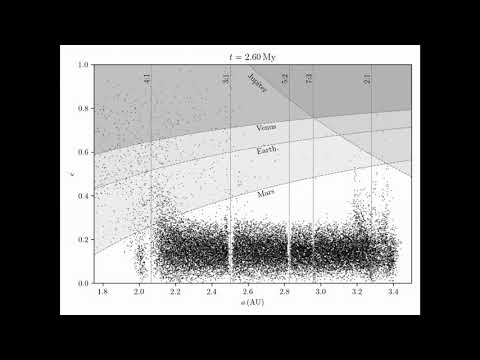

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('LF1jx3z5Qnc', width=800*2, height=600*2)

# Example 3: planetary embryos in the inner Solar System

* 30 embryos in orbits between 0.5 and 1.2 AU
* Masses between 0.2 Earth masses and 0.6 Lunar masses
* Purely gravitational setup (no disk)
* Goal: track close encounters between the embryos

# Detecting close encounters

Mutual distance between pairs of embryos:

$$
D_{ij}\left( t \right) = \left[ x_i\left( t \right) - x_j\left( t \right) \right]^2 +
\left[ y_i\left( t \right) - y_j\left( t \right) \right]^2 +
\left[ z_i\left( t \right) - z_j\left( t \right) \right]^2
$$


Take the time derivative:

$$
\frac{dD_{ij}\left( t \right)}{dt}  = 2\left[ x_i\left( t \right) - x_j\left( t \right) \right]\left[ v_{xi}\left( t \right) - v_{xj}\left( t \right) \right] 
 +2\left[ y_i\left( t \right) - y_j\left( t \right) \right]\left[ v_{yi}\left( t \right) - v_{yj}\left( t \right) \right]
 +2\left[ z_i\left( t \right) - z_j\left( t \right) \right]\left[ v_{zi}\left( t \right) - v_{zj}\left( t \right) \right]
$$

Distance minima/maxima given by the event equation:

$$
\frac{dD_{ij}\left( t \right)}{dt} = 0
$$

# Cumulative number of close encounters

<center><img style="width:75%;" src="e_dist.png"></center>

# Evolution of the semi-major axes

<center><img style="width:50%;" src="a_hist.png"></center>